In [1]:
import torch
import random
import os

import matplotlib.pyplot as plt

In [2]:
DATA_PATH = '../miniproject_dataset'
train_data_name = 'train_data.pkl'
val_data_name = 'val_data.pkl'

In [3]:
noisy_imgs_1, noisy_imgs_2 = torch.load(os.path.join(DATA_PATH, train_data_name))

In [4]:
noisy_imgs_1.shape, noisy_imgs_2.shape

(torch.Size([50000, 3, 32, 32]), torch.Size([50000, 3, 32, 32]))

In [5]:
# Get random index
rand_idx = random.randint(0, noisy_imgs_1.shape[0])
rand_idx

48671

In [6]:
# Shuffle images
rand_permutation = torch.randperm(noisy_imgs_1.shape[0])
rand_permutation.shape

torch.Size([50000])

In [7]:
noisy_imgs_1_rand = noisy_imgs_1[rand_permutation][:, :, :]
noisy_imgs_1_rand.shape

torch.Size([50000, 3, 32, 32])

In [8]:
rand_img_1, rand_img_2 = noisy_imgs_1_rand[rand_idx], noisy_imgs_1_rand[rand_idx]

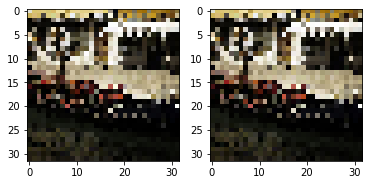

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(rand_img_1.permute(1, 2, 0))
axs[1].imshow(rand_img_2.permute(1, 2, 0))
plt.show()

In [10]:
noisy_imgs, clean_imgs = torch.load(os.path.join(DATA_PATH, val_data_name))
noisy_imgs.shape, clean_imgs.shape

(torch.Size([1000, 3, 32, 32]), torch.Size([1000, 3, 32, 32]))

In [11]:
rand_idx = random.randint(0, noisy_imgs.shape[0])
rand_noisy_img, rand_clean_img = noisy_imgs[rand_idx, :, :, :], clean_imgs[rand_idx, :, :, :]

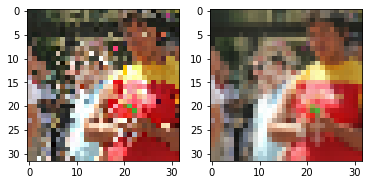

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(rand_noisy_img.permute(1, 2, 0))
axs[1].imshow(rand_clean_img.permute(1, 2, 0))
plt.show()

### Augmentation

In [13]:
from utils.augmentation import AugmentedDataset

ads = AugmentedDataset(noisy_imgs_1, noisy_imgs_2)
n_img1, n_img2 = ads[rand_idx]
aug_n_img1, aug_n_img2 = ads.transform_pair(n_img1, n_img2)
aug_n_img1.shape, aug_n_img2.shape

(torch.Size([3, 32, 32]), torch.Size([3, 32, 32]))

In [14]:
n_imgs1, n_imgs2 = ads[:4]
aug_n_imgs1, aug_n_imgs2 = ads.transform_pair(n_imgs1, n_imgs2)
aug_n_imgs1.shape, aug_n_imgs2.shape

(torch.Size([4, 3, 32, 32]), torch.Size([4, 3, 32, 32]))

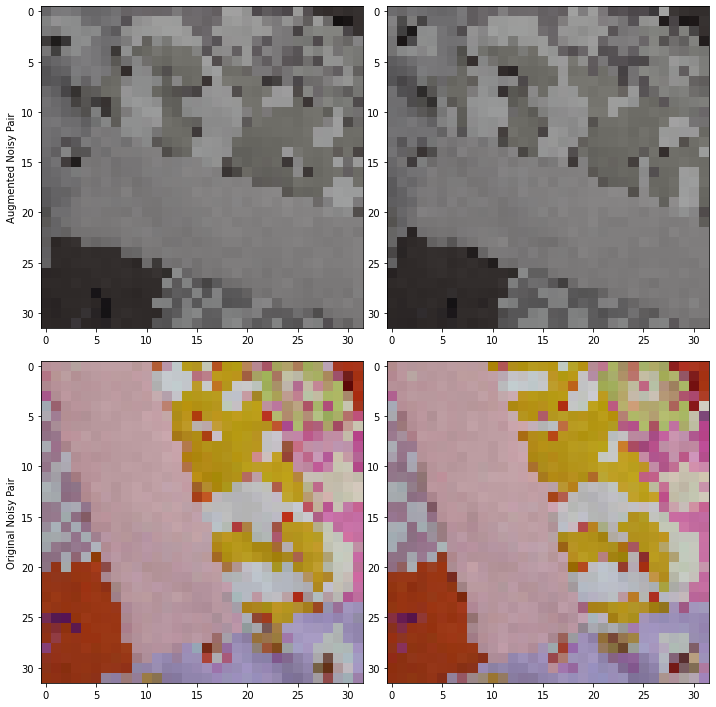

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
# [[col.axis('off') for col in row] for row in axs]
# Augmented noisy pair
axs[0, 0].set_ylabel('Augmented Noisy Pair')
axs[0, 0].imshow(aug_n_imgs1[2].permute(1, 2, 0))
axs[0, 1].imshow(aug_n_imgs2[2].permute(1, 2, 0))
# Orig noisy pair
axs[1, 0].set_ylabel('Original Noisy Pair')
axs[1, 0].imshow(n_imgs1[2].permute(1, 2, 0))
axs[1, 1].imshow(n_imgs2[2].permute(1, 2, 0))
plt.tight_layout()
plt.show()

In [134]:
rand_idx = random.randint(0, noisy_imgs.shape[0])
n_img1, n_img2 = ads[rand_idx]

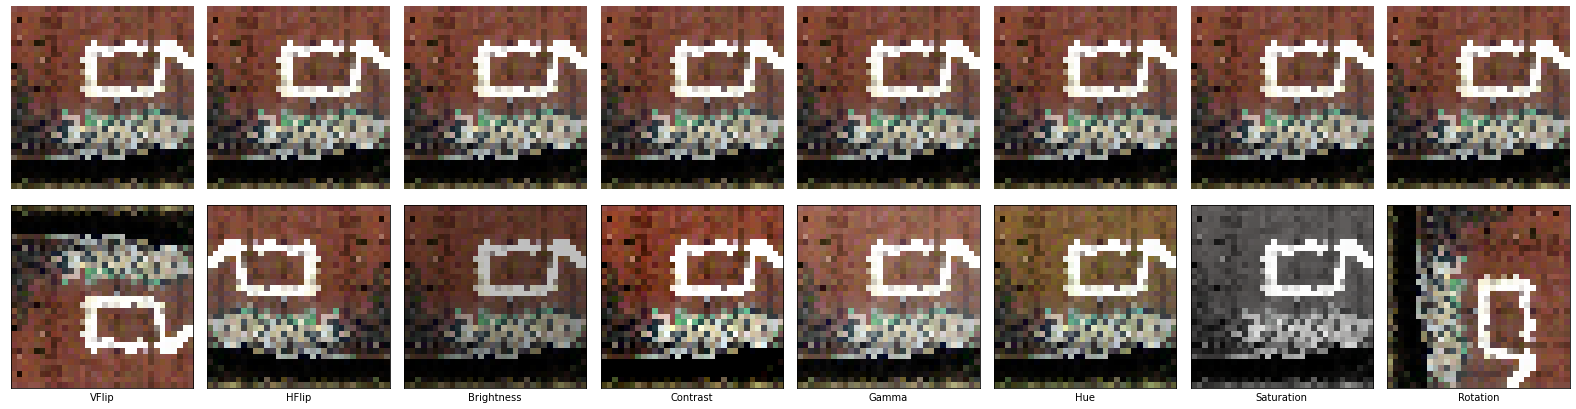

In [135]:
# 8 augmentations
transformations, probabilities = ads.transforms, ads.probas
transformations_text = ['VFlip', 'HFlip', 'Brightness', 'Contrast', 'Gamma', 'Hue', 'Saturation', 'Rotation']
fig, axs = plt.subplots(nrows=2, ncols=len(transformations), figsize=(22, 6))
for idx, (transform, prob) in enumerate(zip(transformations, probabilities)):
    args = prob[1:]
    aug_n_img1 = transform(n_img1) if len(args) == 0 else transform(n_img1, *args)
    axs[0, idx].imshow(n_img1.permute(1, 2, 0))
    axs[1, idx].imshow(aug_n_img1.permute(1, 2, 0))
    axs[0, idx].axis('off')
    axs[1, idx].set_xlabel(f'{transformations_text[idx]}')
    axs[1, idx].set_xticks([])
    axs[1, idx].set_yticks([])
plt.tight_layout()
plt.savefig(f'figures/all_augmentations_tworows_{rand_idx}.png', dpi=150)
plt.show()

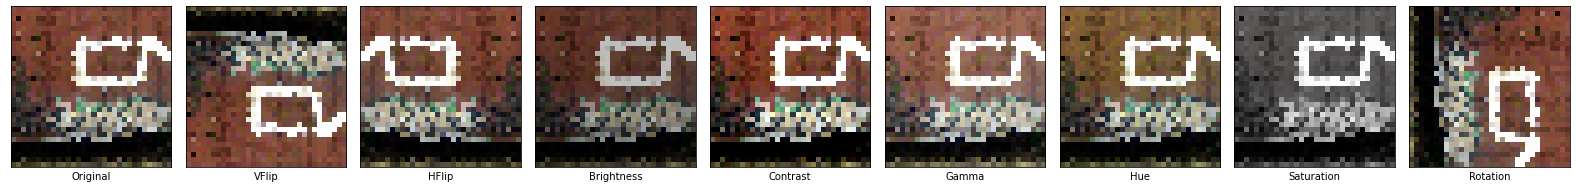

In [136]:
# 8 augmentations
transformations, probabilities = ads.transforms, ads.probas
transformations_text = ['Original', 'VFlip', 'HFlip', 'Brightness', 'Contrast', 'Gamma', 'Hue', 'Saturation', 'Rotation']
fig, axs = plt.subplots(nrows=1, ncols=len(transformations) + 1, figsize=(22, 4))
axs[0].imshow(n_img1.permute(1, 2, 0))
axs[0].set_xlabel(f'{transformations_text[0]}')
axs[0].set_xticks([])
axs[0].set_yticks([])
for idx, (transform, prob) in enumerate(zip(transformations, probabilities)):
    args = prob[1:]
    aug_n_img1 = transform(n_img1) if len(args) == 0 else transform(n_img1, *args)
    axs[idx + 1].imshow(aug_n_img1.permute(1, 2, 0))
    axs[idx + 1].set_xlabel(f'{transformations_text[idx + 1]}')
    axs[idx + 1].set_xticks([])
    axs[idx + 1].set_yticks([])
plt.tight_layout()
plt.savefig(f'figures/all_augmentations_onerow_{rand_idx}.png', dpi=150)
plt.show()

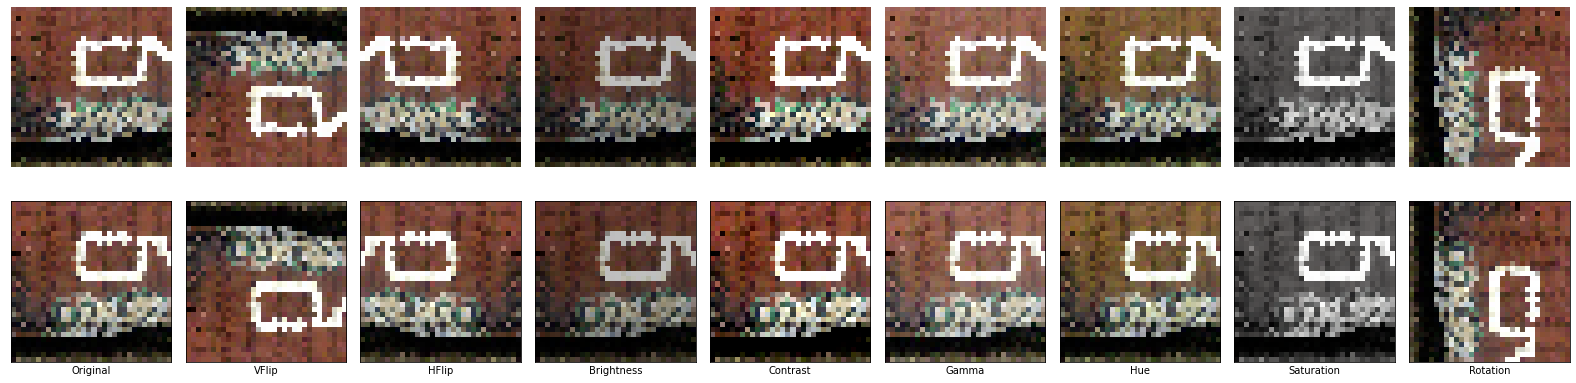

In [137]:
transformations, probabilities = ads.transforms, ads.probas
transformations_text = ['Original', 'VFlip', 'HFlip', 'Brightness', 'Contrast', 'Gamma', 'Hue', 'Saturation', 'Rotation']
fig, axs = plt.subplots(nrows=2, ncols=len(transformations) + 1, figsize=(22, 6))
axs[0, 0].imshow(n_img1.permute(1, 2, 0))
axs[0, 0].axis('off')
axs[1, 0].imshow(n_img2.permute(1, 2, 0))
axs[1, 0].set_xlabel(f'{transformations_text[0]}')
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])
for idx, (transform, prob) in enumerate(zip(transformations, probabilities)):
    args = prob[1:]
    aug_n_img1 = transform(n_img1) if len(args) == 0 else transform(n_img1, *args)
    aug_n_img2 = transform(n_img2) if len(args) == 0 else transform(n_img2, *args)
    axs[0, idx+1].imshow(aug_n_img1.permute(1, 2, 0))
    axs[1, idx+1].imshow(aug_n_img2.permute(1, 2, 0))
    axs[0, idx+1].axis('off')
    axs[1, idx+1].set_xlabel(f'{transformations_text[idx+1]}')
    axs[1, idx+1].set_xticks([])
    axs[1, idx+1].set_yticks([])
plt.tight_layout()
plt.savefig(f'figures/all_augmentations_tworows_{rand_idx}_both.png', dpi=150)
plt.show()

### Model Testing

In [83]:
from model import Model

model = Model()
model.load_pretrained_model()

Loading pretrained model from /home/yusuf/PycharmProjects/deep-learning-minis/Miniproject_1/bestmodel.pth


In [84]:
rand_idx = random.randint(0, noisy_imgs.shape[0])
rand_noisy_img, rand_clean_img = noisy_imgs[rand_idx, :, :, :], clean_imgs[rand_idx, :, :, :]

In [85]:
model_input = rand_noisy_img.reshape(1, rand_noisy_img.shape[0], rand_noisy_img.shape[1], rand_noisy_img.shape[2])
model_input.shape, model_input.min(), model_input.max()

(torch.Size([1, 3, 32, 32]),
 tensor(0, dtype=torch.uint8),
 tensor(255, dtype=torch.uint8))

In [86]:
pred = model.predict(model_input).cpu()
pred.shape, pred.min(), pred.max()

(torch.Size([1, 3, 32, 32]),
 tensor(6, dtype=torch.uint8),
 tensor(252, dtype=torch.uint8))

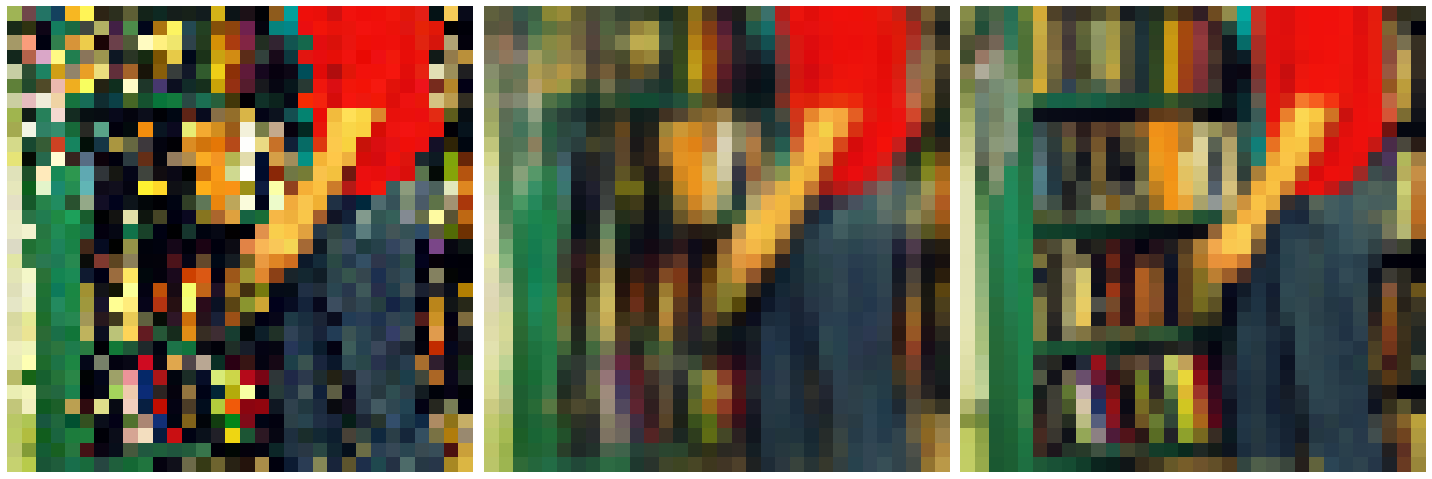

In [87]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
axs[0].imshow(model_input[0].permute(1, 2, 0))
axs[1].imshow(pred[0].permute(1, 2, 0))
axs[2].imshow(rand_clean_img.permute(1, 2, 0))
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
plt.tight_layout()
plt.savefig(f'figures/result{rand_idx}.png', dpi=150)
plt.show()

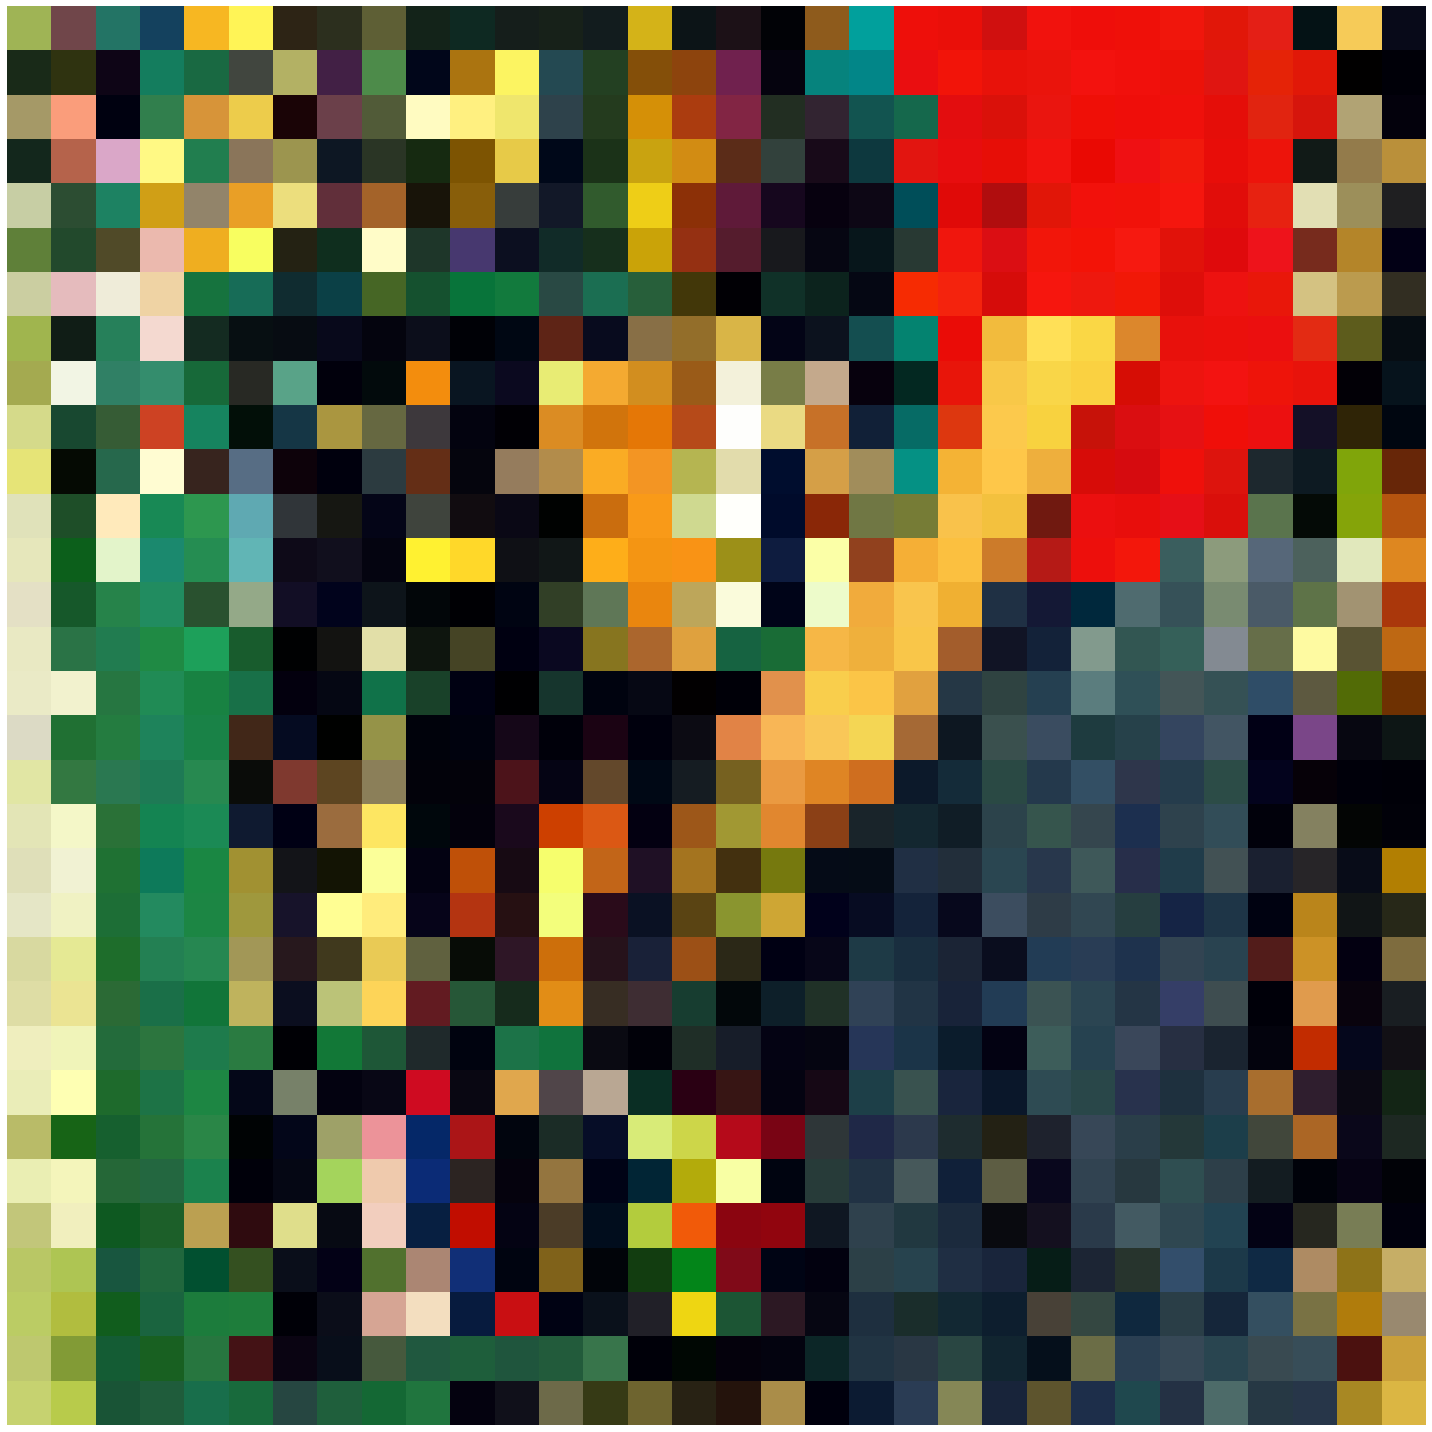

In [88]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
axs.imshow(model_input[0].permute(1, 2, 0))
axs.axis('off')
plt.tight_layout()
plt.savefig(f'figures/result{rand_idx}-1.png', dpi=150)
plt.show()

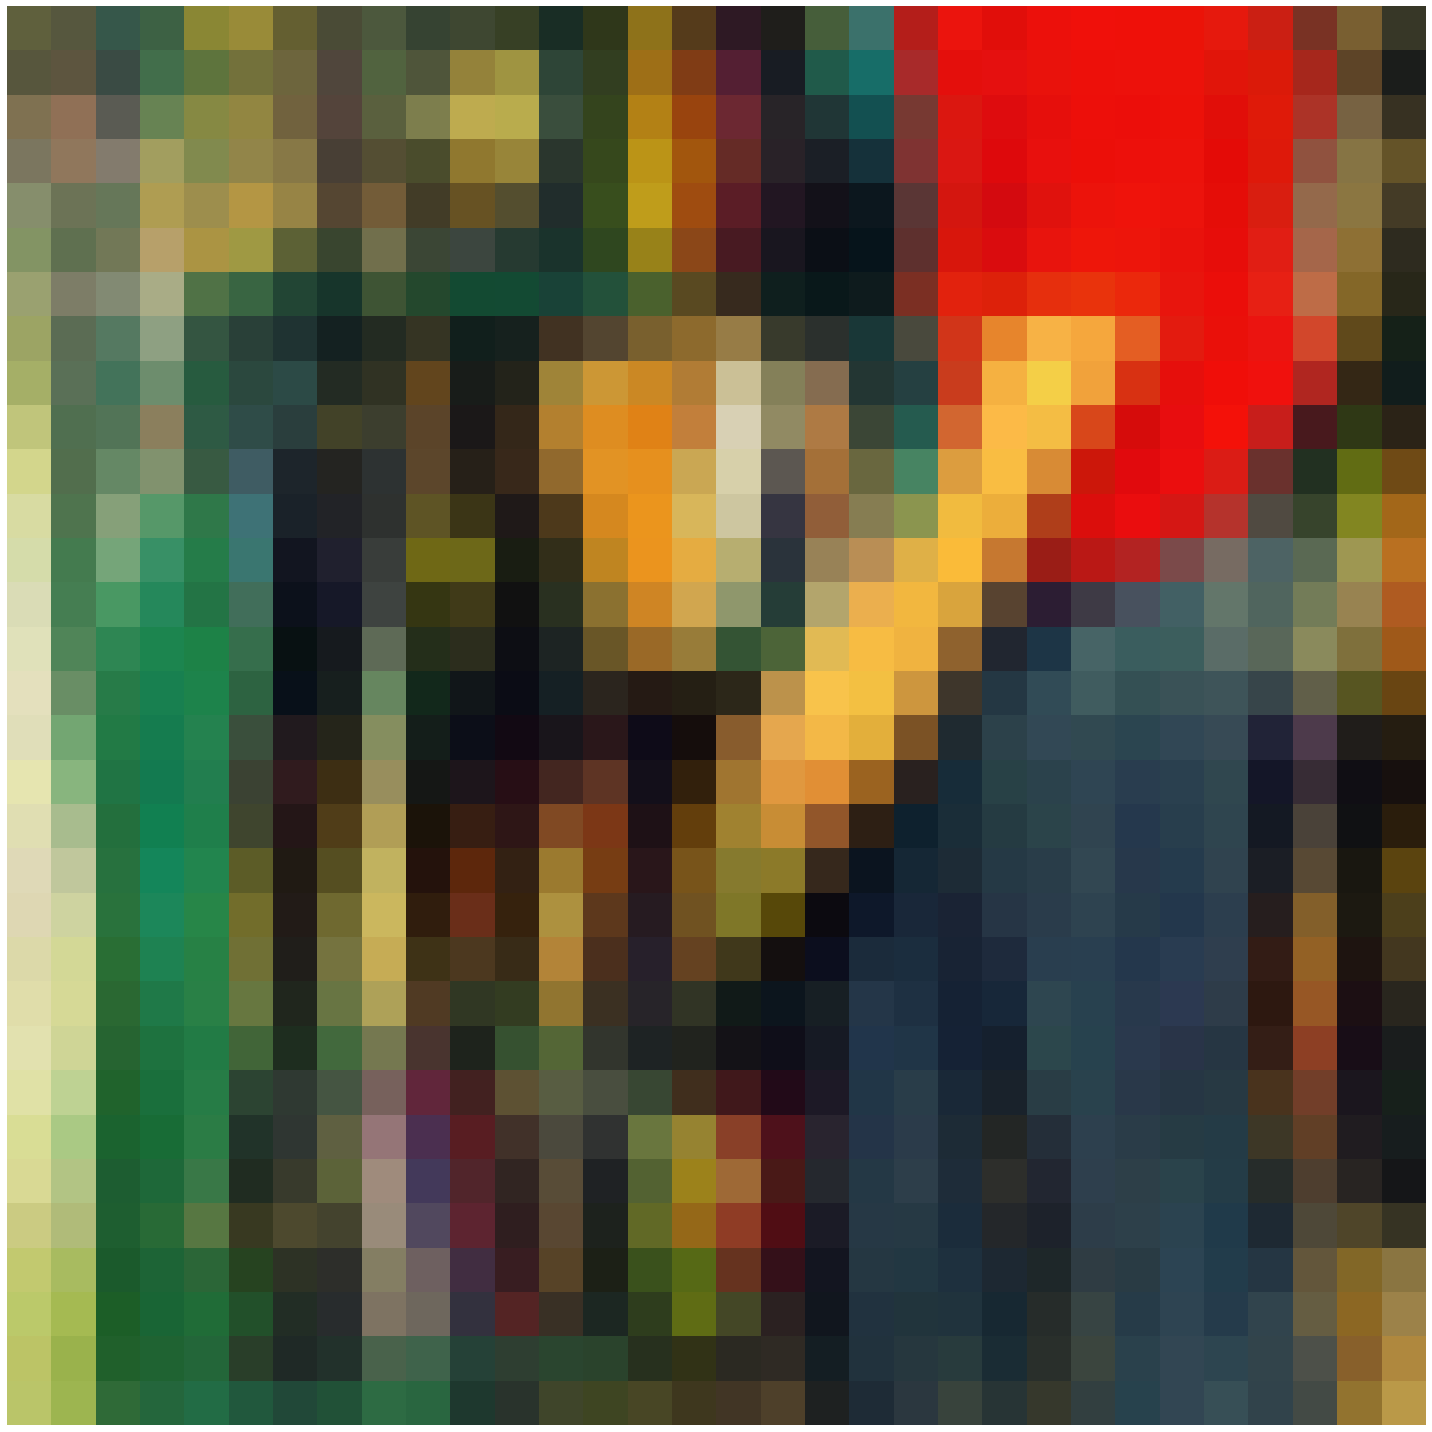

In [89]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
axs.imshow(pred[0].permute(1, 2, 0))
axs.axis('off')
plt.tight_layout()
plt.savefig(f'figures/result{rand_idx}-2.png', dpi=150)
plt.show()

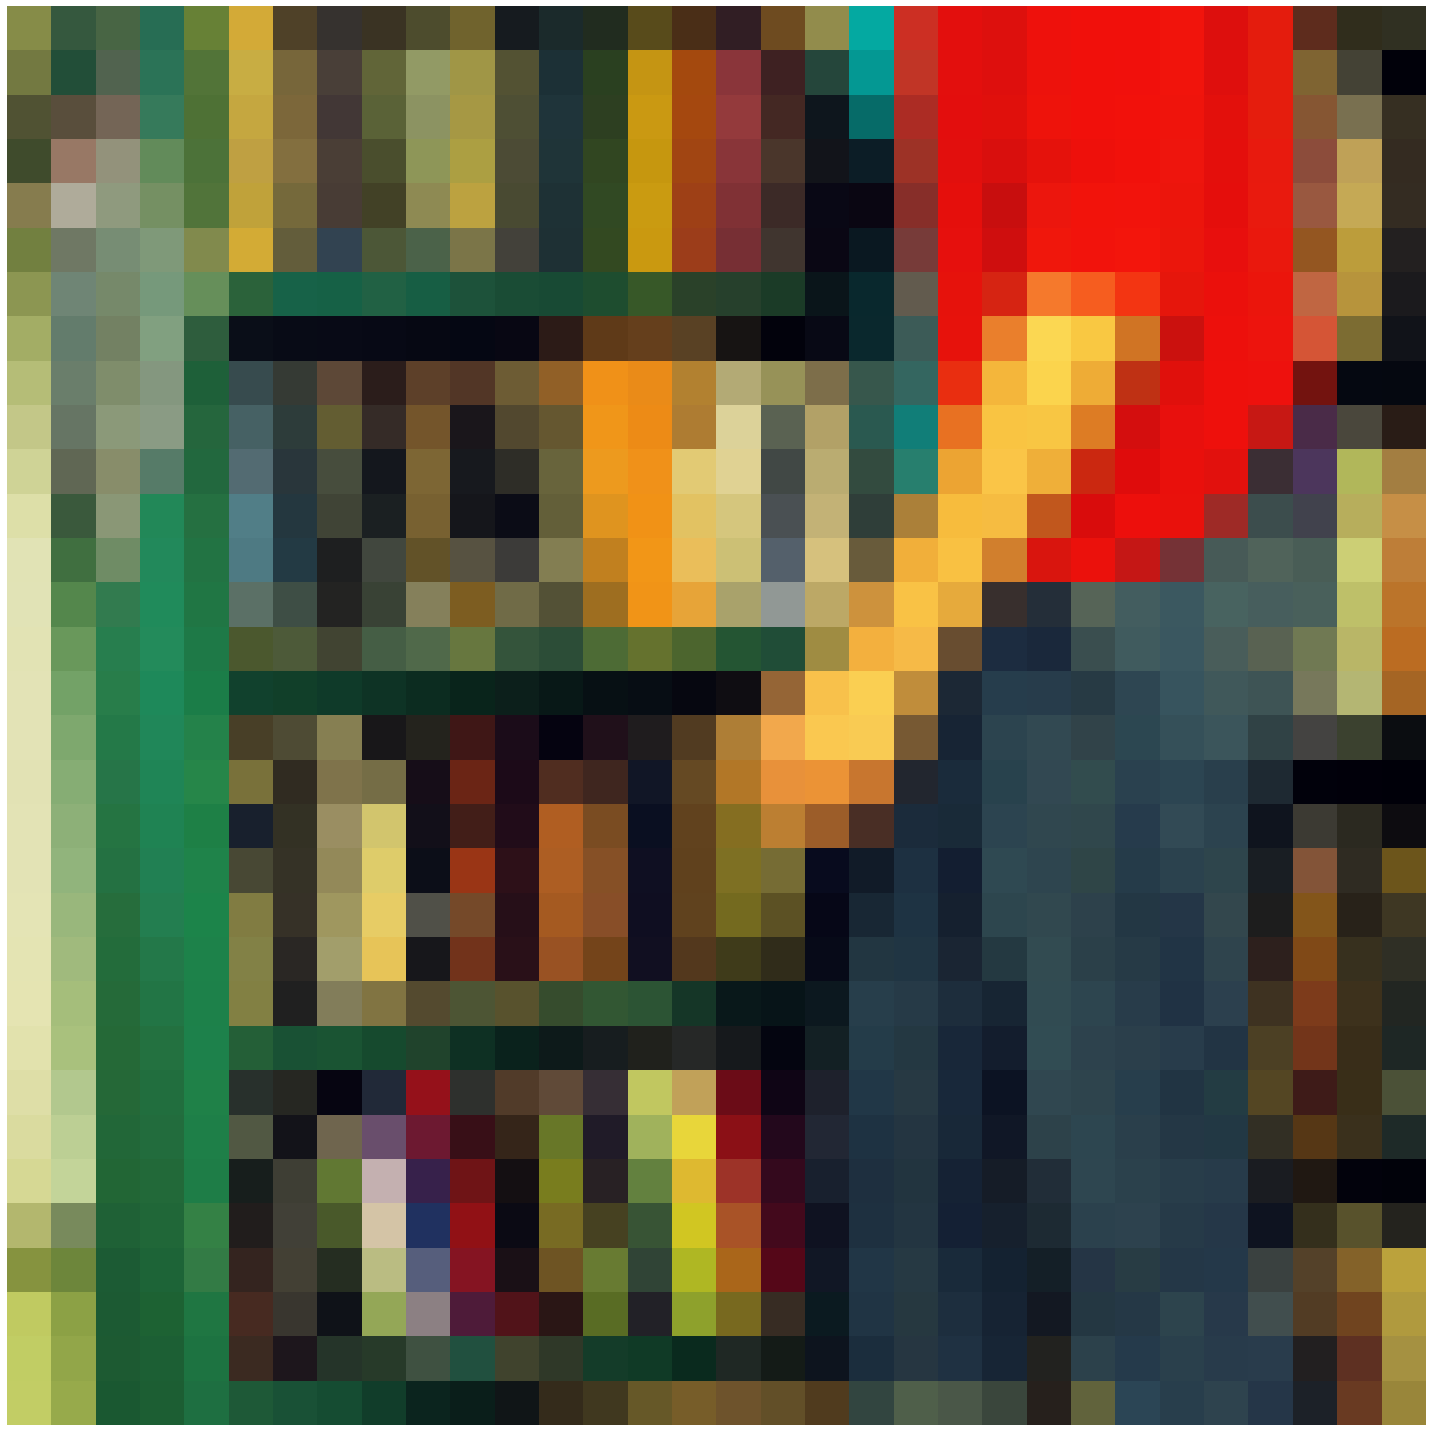

In [90]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
axs.imshow(rand_clean_img.permute(1, 2, 0))
axs.axis('off')
plt.tight_layout()
plt.savefig(f'figures/result{rand_idx}-3.png', dpi=150)
plt.show()